In [41]:
import xarray as xr
from matplotlib import pyplot as plt
from cartopy import crs as ccrs
import cartopy.feature as cfeature
import numpy as np

In [3]:
# Function to calculate area-weighted annual mean temperature for a region
def area_weighted(temp_data,area_data,region):
    # Get area, temperature data for region
    area = area_data.sel(lon=masks[region][0],lat=masks[region][1])
    temp = temp_data.sel(lon=masks[region][0],lat=masks[region][1])
    
    # Calculate area-weighted average
    area_mean = (temp*area).sum(['lon','lat'])/area.sum(['lon','lat'])
    return area_mean

In [86]:
# Specify root directory, experiment, filename format
rootdir = '/local/ss23/GFDL_LEs/ATM/'
experiment = 'RCP85'
filename = '/t_ref.rcp85.ens*.1950_2100.nc'
paths = rootdir+experiment+filename

# Load data from matching files
data = xr.open_mfdataset(paths,combine='nested',concat_dim='ensemble')

# Calculate ensemble mean
mean_data = data.mean(dim='ensemble')
mean_annual = mean_data['t_ref'].groupby('time.year').mean()

In [87]:
# Dictionary of region masks, sliced by lon and lat
masks = {}
masks['Northern North America'] = [slice(190,310),slice(45,75)]
masks['Central North America'] = [slice(230,310),slice(35,45)]
masks['South-Central America'] = [slice(230,330),slice(-30,35)]
masks['Southern South America'] = [slice(270,330),slice(-60,-30)]
masks['China'] = [slice(75,135),slice(22.5,50)]
masks['India'] = [slice(70,90),slice(10,30)]
masks['Oceania'] = [slice(100,165),slice(-45,10)]
masks['Russia'] = [slice(30,180),slice(50,75)]
masks['Scandinavia'] = [slice(3,30),slice(55,70)]

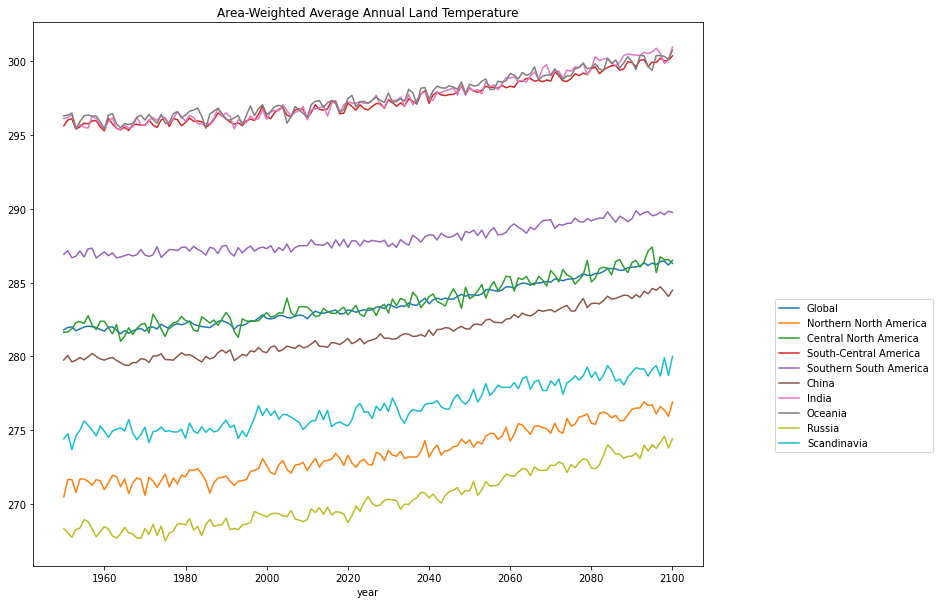

In [93]:
# Load area data
filename_area = 'land_static.nc'
path_area = rootdir+filename_area
land_area = xr.open_dataset(path_area)['land_area']

# Create figure, axes
fig, ax = plt.subplots(figsize=(12,10))

# Calculate global area-weighted average
area_mean = (mean_annual*land_area).sum(['lon','lat'])/land_area.sum(['lon','lat'])
area_mean.plot(ax=ax)

# Plot regions
for region in masks.keys():
    # Calculate area-weighted average temperature
    regional_mean = area_weighted(mean_annual,land_area,region)

    # Plot area-weighted average
    regional_mean.plot(ax=ax)

ax.set_title('Area-Weighted Average Annual Land Temperature')
ax.legend(['Global']+list(masks.keys()),bbox_to_anchor=(1.1,0.5))

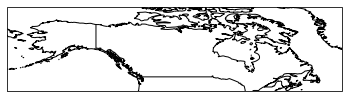

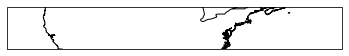

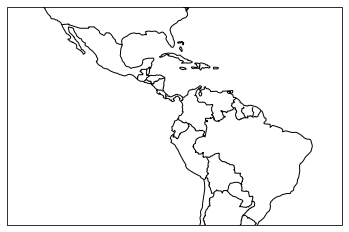

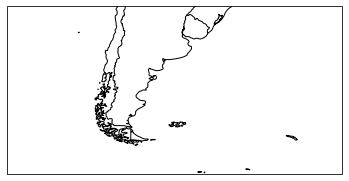

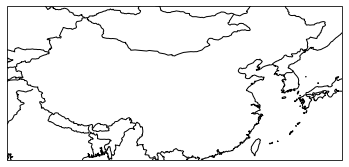

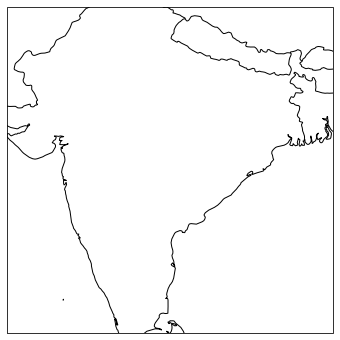

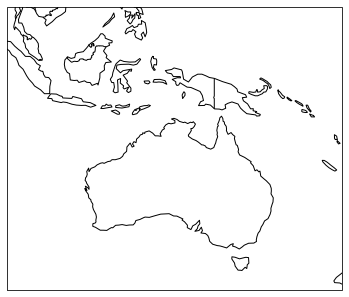

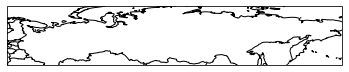

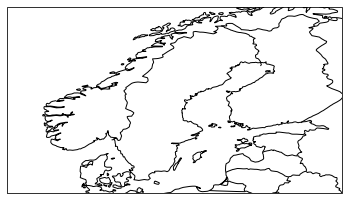

In [82]:
# Check what region corresponds to each mask
for region in masks.keys():
    # Specify projection
    crs = ccrs.PlateCarree()
    
    fig, ax = plt.subplots(figsize=(6,6),subplot_kw={'projection':crs})
    
    # Get longitude and latitude bounds for mask
    ax.plot([masks[region][0].start,masks[region][0].stop],[masks[region][1].start,masks[region][1].stop],transform=crs,linewidth=0)
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS.with_scale('50m'))